In [1]:
import pandas as pd 
columns = ['Time','price', 'NumOfBeedroom', 'NumOfBathroom', 'AreaOfHouse', 'AreaOfParking', 'NumOfFloor', 'Rating', 'AreaOfBuilding',
           'AreaOfUnderGround', 'YearOfBuild', 'YearOfRepair', 'Latitude', 'Longitude']
df = pd.read_csv('kc_train.csv',header=None,index_col=None,names=columns) 
df.head()

,Time,price,NumOfBeedroom,NumOfBathroom,AreaOfHouse,AreaOfParking,NumOfFloor,Rating,AreaOfBuilding,AreaOfUnderGround,YearOfBuild,YearOfRepair,Latitude,Longitude
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [2]:
import matplotlib
import matplotlib.pyplot as plt
df.hist(figsize=(14,20))
plt.show() 

<Figure size 1400x2000 with 16 Axes>

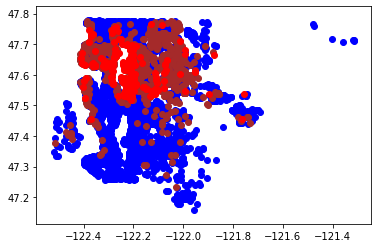

In [3]:
x = df.loc[df['price']<750000,'Latitude':'Longitude'] 
plt.scatter(x.loc[:,'Longitude'],x.loc[:,'Latitude'],c='#0000FF')
df_temp=df.loc[df['price']>750000,:] 
y = df_temp.loc[df_temp['price']<1500000,'Latitude':'Longitude'] 
plt.scatter(y.loc[:, 'Longitude'],y.loc[:,'Latitude'],c='#A52A2A')
z=df.loc[df['price']>1500000,'Latitude': 'Longitude'] 
plt.scatter(z.loc[:, 'Longitude'],z.loc[:,'Latitude'],c='#FF0000')

In [4]:
# 极坐标转换
import numpy as np
def polar_coordinates(x, y, x_min, y_min):
    # 极坐标半径    
    radius =  np.sqrt((x - x_min) ** 2 + (y - y_min) ** 2)    
    # radius = np.sqrt((x ** 2+y ** 2))     
    
    # 极坐标角度    
    angle = np.arctan((y - y_min) / (x - x_min)) * 180 / np.pi    
    # angle = np.arctan(y / x * 180 / np.pi)     
    return radius, angle  

# 极坐标地址
def get_radius_angle(loc_x, loc_y):     
    x_min, y_min = loc_x.min(), loc_y.min()    
    radius=[]
    angle=[]     
    for x, y in zip(loc_x, loc_y):        
        radius.append(polar_coordinates(x, y, x_min, y_min)[0])        
        angle.append(polar_coordinates(x, y, x_min, y_min)[1])     
        
    radius = np.array(radius)    
    angle = np.array(angle)   
        
    return radius, angle

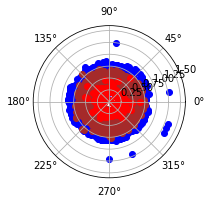

In [5]:
 # 经纬度 转换极坐标  
import warnings
warnings.filterwarnings("ignore")

temp_all1 = pd.DataFrame()
loc_x = x.loc[:, 'Longitude'].values    
loc_y = x.loc[:,'Latitude'].values    
radius, angle = get_radius_angle(loc_x, loc_y)    
temp_all1['radius'] = radius.round(decimals=8)    
temp_all1['angle'] = angle.round(decimals=8)
plt.subplot(121,projection='polar')
plt.scatter(temp_all1['angle'],temp_all1['radius'],c='#0000FF')

temp_all2 = pd.DataFrame()
loc_x = y.loc[:, 'Longitude'].values    
loc_y = y.loc[:,'Latitude'].values    
radius, angle = get_radius_angle(loc_x, loc_y)    
temp_all2['radius'] = radius.round(decimals=8)    
temp_all2['angle'] = angle.round(decimals=8)
plt.subplot(121,projection='polar')
plt.scatter(temp_all2['angle'],temp_all2['radius'],c='#A52A2A')

temp_all3 = pd.DataFrame()
loc_x = z.loc[:, 'Longitude'].values    
loc_y = z.loc[:,'Latitude'].values    
radius, angle = get_radius_angle(loc_x, loc_y)    
temp_all3['radius'] = radius.round(decimals=8)    
temp_all3['angle'] = angle.round(decimals=8)
plt.subplot(121,projection='polar')
plt.scatter(temp_all3['angle'],temp_all3['radius'],c='#FF0000')

plt.show()

In [6]:
def get_feature(df):
    sell_year, sell_month, sell_day, build_age, repair_age = [], [], [], [], []
    for [time, build_year, repair_year] in df[['Time', 'YearOfBuild', 'YearOfRepair']].values:
        year, month, day = int(str(time)[0:4]), int(str(time)[4:6]), int(str(time)[6:8])
        sell_year.append(year)
        sell_month.append(month)
        sell_day.append(day)
        build_age.append(year-build_year)
        if repair_year == 0:
            repair_age.append(0)
        else:
            repair_age.append(year-repair_year)
    df.drop(columns=['Time'], inplace=True)
    df['sell_year'] = sell_year
    df['sell_month'] = sell_month
    df['sell_quarter']=df['sell_month'].apply(lambda x: 1 if x<4 else 2 if x<7 else 3 if x<10 else 4)
    df['sell_day'] = sell_day
    df['build_age'] = build_age
    df['repair_age'] = repair_age

In [7]:
get_feature(df)
df.head()

,price,NumOfBeedroom,NumOfBathroom,AreaOfHouse,AreaOfParking,NumOfFloor,Rating,AreaOfBuilding,AreaOfUnderGround,YearOfBuild,YearOfRepair,Latitude,Longitude,sell_year,sell_month,sell_quarter,sell_day,build_age,repair_age
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,2015,3,1,2,41,0
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,2015,2,1,11,31,0
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,2015,1,1,7,8,0
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,2014,11,4,3,25,0
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,2014,6,2,3,45,0


In [8]:
loc_x = df.loc[:, 'Longitude'].values    
loc_y = df.loc[:,'Latitude'].values    
radius, angle = get_radius_angle(loc_x, loc_y)    
df['radius'] = radius.round(decimals=8)    
df['angle'] = angle.round(decimals=8)
df.drop(columns=['Longitude'], inplace=True)
df.drop(columns=['Latitude'], inplace=True)
df.head()

,price,NumOfBeedroom,NumOfBathroom,AreaOfHouse,AreaOfParking,NumOfFloor,Rating,AreaOfBuilding,AreaOfUnderGround,YearOfBuild,YearOfRepair,sell_year,sell_month,sell_quarter,sell_day,build_age,repair_age,radius,angle
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,2015,3,1,2,41,0,0.630206,49.891772
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,2015,2,1,11,31,0,0.676031,44.400694
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,2015,1,1,7,8,0,0.650080,37.317636
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,2014,11,4,3,25,0,0.541580,45.291750
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,2014,6,2,3,45,0,0.666973,58.650250


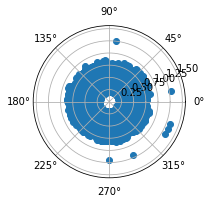

In [9]:
plt.subplot(121,projection='polar')
plt.scatter(df['angle'],df['radius'])

In [10]:
df['AreaOfHouse'].replace(0, 1, inplace=True)
df['AreaOfBuilding'].replace(0, 1, inplace=True)
df['AreaOfParking'].replace(0, 1, inplace=True)
df['B_H_ratio'] = df['AreaOfBuilding']/df['AreaOfHouse']
df['P_H_ratio'] = df['AreaOfParking']/df['AreaOfHouse']
df.head()

,price,NumOfBeedroom,NumOfBathroom,AreaOfHouse,AreaOfParking,NumOfFloor,Rating,AreaOfBuilding,AreaOfUnderGround,YearOfBuild,...,sell_year,sell_month,sell_quarter,sell_day,build_age,repair_age,radius,angle,B_H_ratio,P_H_ratio
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,...,2015,3,1,2,41,0,0.630206,49.891772,0.742515,3.736527
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,...,2015,2,1,11,31,0,0.676031,44.400694,1.000000,3.186061
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,...,2015,1,1,7,8,0,0.650080,37.317636,1.000000,1.656113
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,...,2014,11,4,3,25,0,0.541580,45.291750,1.000000,3.284483
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,...,2014,6,2,3,45,0,0.666973,58.650250,0.588235,3.670588


In [11]:
df.to_csv('re_train_data.csv',header=None,index=None)

In [13]:
new_df = pd.read_csv('re_train_data.csv',header=None,index_col=None) 
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,...,2015,3,1,2,41,0,0.630206,49.891772,0.742515,3.736527
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,...,2015,2,1,11,31,0,0.676031,44.400694,1.000000,3.186061
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,...,2015,1,1,7,8,0,0.650080,37.317636,1.000000,1.656113
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,...,2014,11,4,3,25,0,0.541580,45.291750,1.000000,3.284483
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,...,2014,6,2,3,45,0,0.666973,58.650250,0.588235,3.670588
